In [1]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [3]:
dataset = pd.read_excel(r'C:\Users\mandar\Desktop\Airline Tickets.xlsx')

In [4]:
# Data Exploration
dataset.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [5]:
dataset.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


In [6]:
dataset.shape

(10683, 11)

In [7]:
dataset.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [8]:
dataset.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [9]:
# checking for null values
dataset.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [10]:
# removing null values
dataset.dropna(inplace=True)

In [11]:
dataset.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [12]:
dataset.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

Text(0.5, 1.0, 'Flight vs Price')

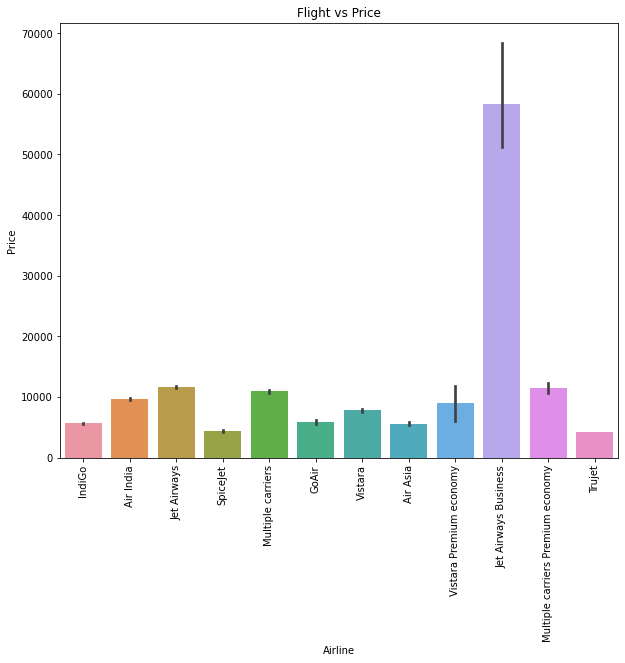

In [13]:
# 'flight' exploaration
plt.figure(figsize = (10, 8))
chart=sns.barplot(x='Airline',y='Price',data=dataset)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.title('Flight vs Price')

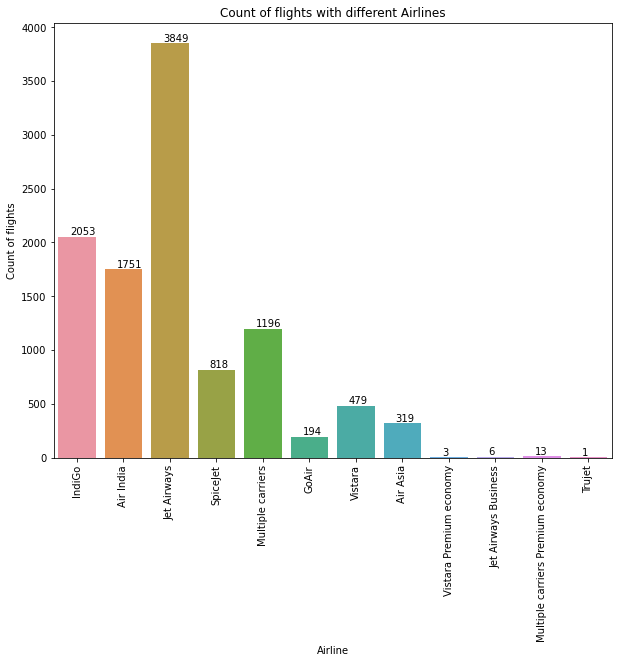

In [14]:
plt.figure(figsize = (10, 8))
plt.title('Count of flights with different Airlines')
ax=sns.countplot(x = 'Airline', data =dataset)
plt.xlabel('Airline')
plt.ylabel('Count of flights')
plt.xticks(rotation = 90)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom',
                    color= 'black')

[Text(0, 0, 'IndiGo'),
 Text(1, 0, 'Air India'),
 Text(2, 0, 'Jet Airways'),
 Text(3, 0, 'SpiceJet'),
 Text(4, 0, 'Multiple carriers'),
 Text(5, 0, 'GoAir'),
 Text(6, 0, 'Vistara'),
 Text(7, 0, 'Air Asia'),
 Text(8, 0, 'Vistara Premium economy'),
 Text(9, 0, 'Jet Airways Business'),
 Text(10, 0, 'Multiple carriers Premium economy'),
 Text(11, 0, 'Trujet')]

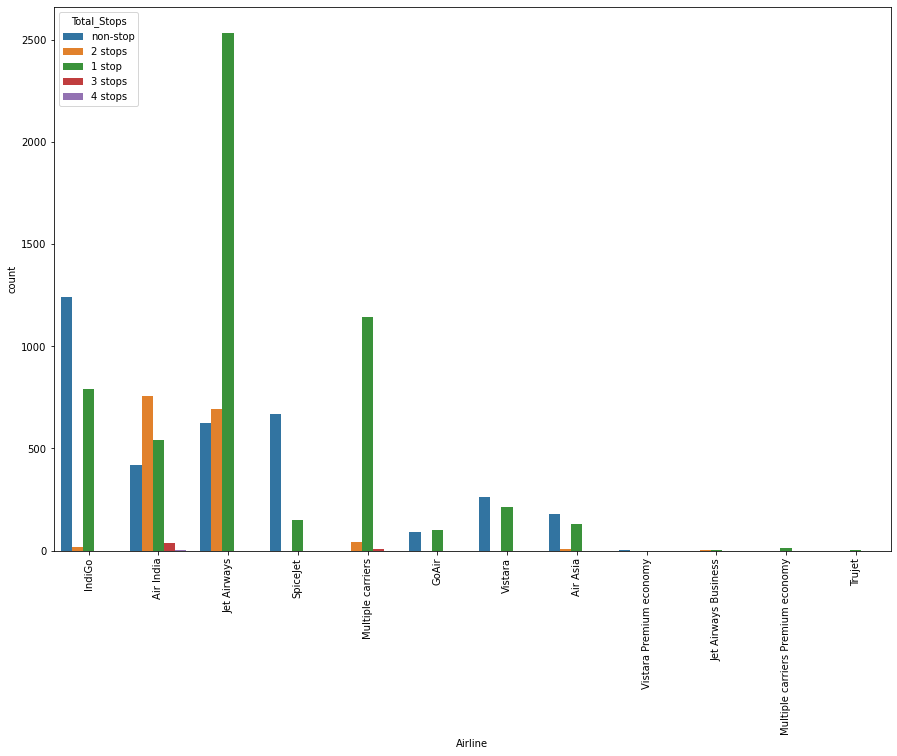

In [15]:
plt.figure(figsize = (15, 10))
chart=sns.countplot(x='Airline',hue='Total_Stops',data=dataset)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

Text(0, 0.5, 'Price of ticket')

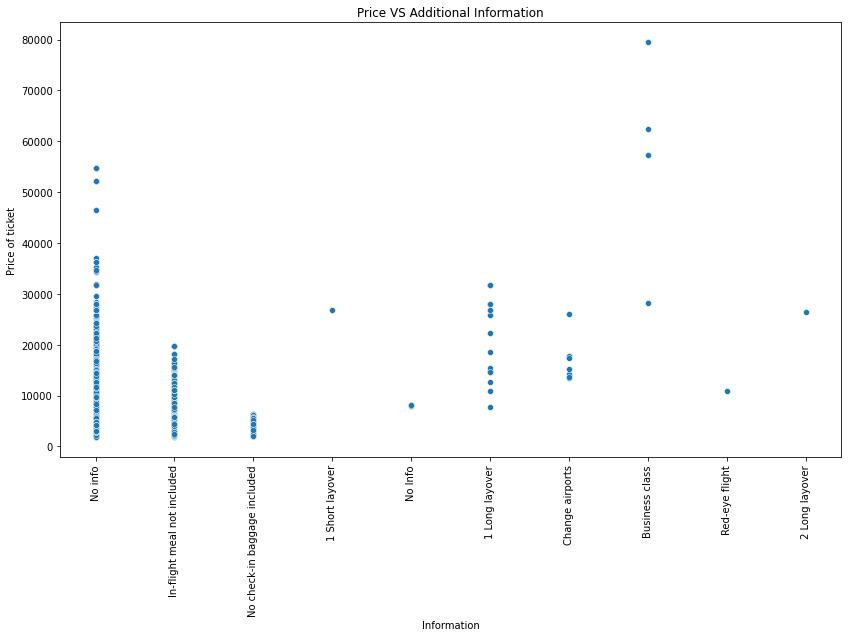

In [16]:
plt.figure(figsize = (14, 8))
plt.title('Price VS Additional Information')
sns.scatterplot(dataset['Additional_Info'], dataset['Price'],data=dataset)
plt.xticks(rotation = 90)
plt.xlabel('Information')
plt.ylabel('Price of ticket')

In [17]:
# 'date_of_journey' exploration
dataset['Date_of_Journey'] = pd.to_datetime(dataset['Date_of_Journey'])

In [18]:
dataset['Date_of_Journey'].nunique()

40

In [19]:
dataset["Journey_day"] = pd.to_datetime(dataset.Date_of_Journey, format="%d/%m/%Y").dt.day

In [20]:
dataset["Journey_month"] = pd.to_datetime(dataset["Date_of_Journey"], format = "%d/%m/%Y").dt.month

In [21]:
dataset['Date_of_Journey'].dt.day_name().value_counts()

Thursday     2290
Friday       1802
Wednesday    1598
Monday       1491
Tuesday      1236
Saturday     1203
Sunday       1062
Name: Date_of_Journey, dtype: int64

In [22]:
dataset['Date_of_Journey'].value_counts(sort =True, ascending=False)

2019-05-18    504
2019-06-06    503
2019-05-21    497
2019-09-06    495
2019-12-06    493
2019-09-05    484
2019-03-21    423
2019-05-15    405
2019-06-03    403
2019-05-27    382
2019-06-27    355
2019-06-24    351
2019-01-06    342
2019-03-06    333
2019-06-15    328
2019-03-24    323
2019-03-03    315
2019-09-03    302
2019-03-27    299
2019-05-24    286
2019-06-05    281
2019-01-05    277
2019-12-05    259
2019-01-04    257
2019-01-03    199
2019-03-15    162
2019-03-18    156
2019-12-03    142
2019-09-04    125
2019-03-04    110
2019-06-21    109
2019-06-18    105
2019-06-04    100
2019-04-27     94
2019-04-24     92
2019-03-05     90
2019-04-15     89
2019-04-21     82
2019-04-18     67
2019-12-04     63
Name: Date_of_Journey, dtype: int64

<AxesSubplot:xlabel='Date_of_Journey', ylabel='Price'>

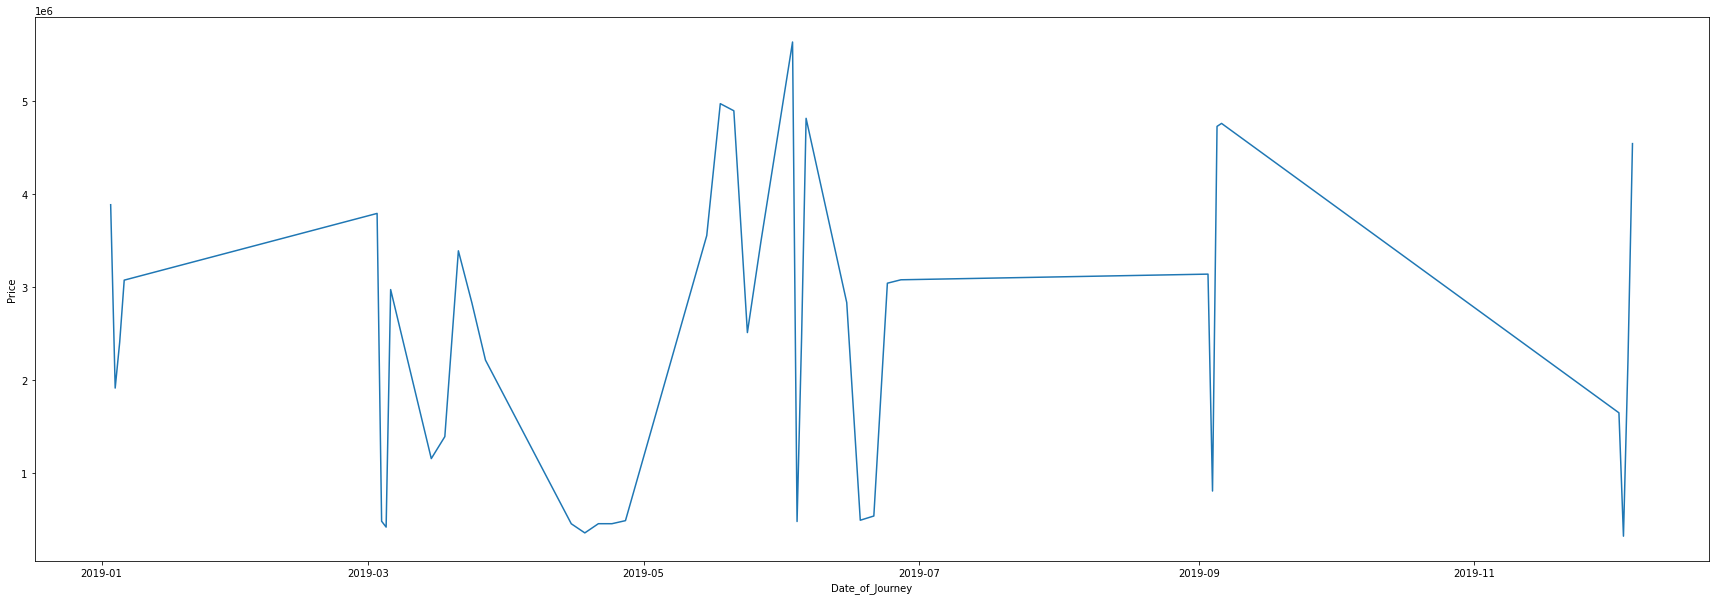

In [23]:
weekly_demand = dataset.groupby(['Date_of_Journey'])['Price'].sum()

plt.figure(figsize=(30,10))
sns.lineplot(x = weekly_demand.index, y = weekly_demand)

In [24]:
#Saving the geographical coordinates

Bengaluru = [12.9791198, 77.5912997]
Mumbai = [19.0759899, 72.8773928]
New_Delhi = [28.5562, 77.1]
Hyderabad = [17.3616079, 78.4746286]
Jaipur = [26.916194, 75.820349]

In [25]:
import folium
from folium.plugins import HeatMap

In [26]:
def generateBaseMap(source, destination):
    
    base_map = folium.Map(location=[20.59, 78.96], control_scale=True, zoom_start=5)

    folium.Marker(location=[source[0], source[1]]).add_to(base_map)  
    folium.Marker(location=[destination[0],destination[1]]).add_to(base_map)
    
    folium.plugins.AntPath([[source, destination]]).add_to(base_map)
    return base_map
generateBaseMap(Mumbai, Jaipur)

In [27]:
dataset['Journey_month'].nunique()

7

In [28]:
dataset['Journey_month'].value_counts(sort =True, ascending=False)

6     2535
3     2211
5     2074
9     1406
1     1075
12     957
4      424
Name: Journey_month, dtype: int64

In [29]:
# 'additional_info' exploration
dataset["Additional_Info"].value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
2 Long layover                     1
1 Short layover                    1
Red-eye flight                     1
Name: Additional_Info, dtype: int64

In [30]:
dataset["Additional_Info"] = dataset["Additional_Info"].replace({'No Info': 'No info'})

In [31]:
dataset.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,6,9
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,3,1


In [32]:
# 'dep_time' exploration
dataset['Dep_Time'] = pd.to_datetime(dataset['Dep_Time'])

In [33]:
# Extracting Hours
dataset["Dep_hour"] = pd.to_datetime(dataset["Dep_Time"]).dt.hour

# Extracting Minutes
dataset["Dep_min"] = pd.to_datetime(dataset["Dep_Time"]).dt.minute

# Now we can drop Dep_Time as it is of no use
dataset.drop(["Dep_Time"], axis = 1, inplace = True)

In [34]:
dataset.head()

,Airline,Date_of_Journey,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,5,1,5,50
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,6,9,9,25
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,5,12,18,5
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,3,1,16,50


In [35]:
# 'arrival_time' exploration
dataset['Arrival_Time'] = pd.to_datetime(dataset['Arrival_Time'])

In [36]:
# Extracting Hours
dataset["Arrival_hour"] = pd.to_datetime(dataset.Arrival_Time).dt.hour

# Extracting Minutes
dataset["Arrival_min"] = pd.to_datetime(dataset.Arrival_Time).dt.minute

# Now we can drop Arrival_Time as it is of no use
dataset.drop(["Arrival_Time"], axis = 1, inplace = True)

In [37]:
dataset.head()

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35


In [38]:
# Assigning and converting Duration column into list
duration = list(dataset["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

In [39]:
# Adding duration_hours and duration_mins list to train_data dataframe

dataset["Duration_hours"] = duration_hours
dataset["Duration_mins"] = duration_mins

In [40]:
dataset.head()

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15,7,25
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,9,25,4,25,19,0
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30,5,25
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35,4,45


In [41]:
# 'price' exploration
dataset['Price'].describe()

count    10682.000000
mean      9087.214567
std       4611.548810
min       1759.000000
25%       5277.000000
50%       8372.000000
75%      12373.000000
max      79512.000000
Name: Price, dtype: float64

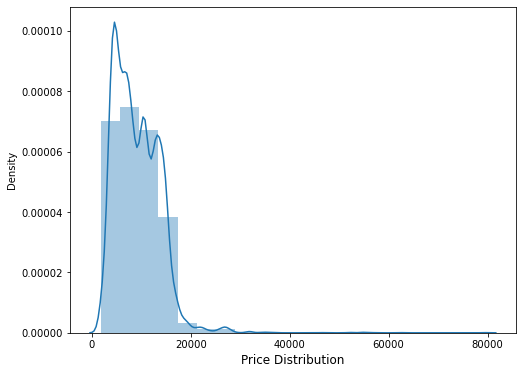

In [42]:
# distribution of Base Price variable
plt.figure(figsize=(8,6))
sns.distplot((dataset['Price'].values), bins=20, kde=True)
plt.xlabel('Price Distribution', fontsize=12)
plt.show()

In [43]:
dataset['Price'].value_counts()

10262    258
10844    212
7229     162
4804     160
4823     131
        ... 
16946      1
10783      1
14861      1
10759      1
4098       1
Name: Price, Length: 1870, dtype: int64

In [44]:
# 'Airline' exploration
dataset["Airline"].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

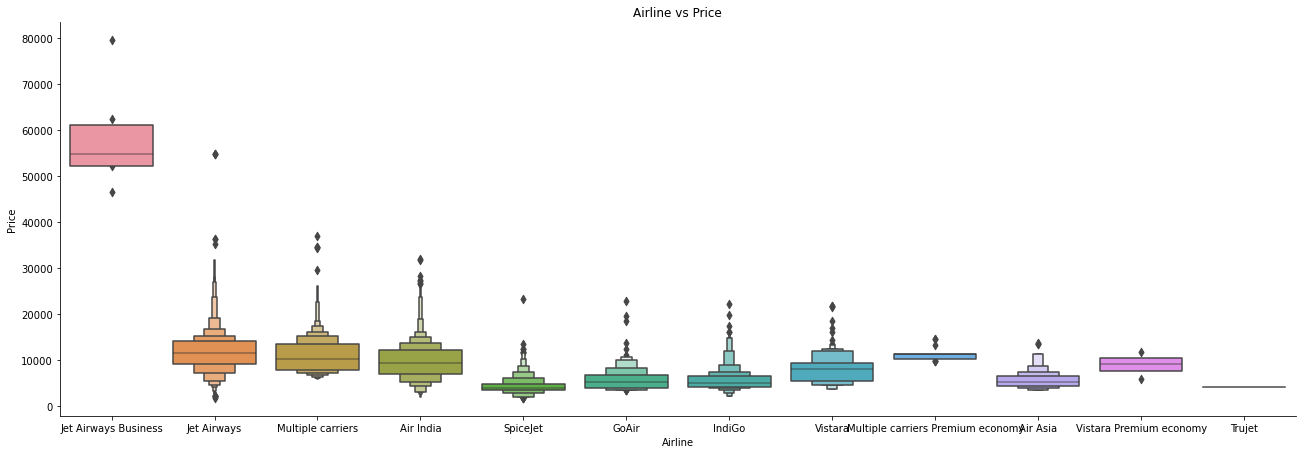

In [45]:
# Airline vs Price
sns.catplot(y = "Price", x = "Airline", data = dataset.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.title('Airline vs Price')
plt.show()

In [46]:
# As Airline is Nominal Categorical data we will perform OneHotEncoding

Airline =dataset[["Airline"]]

Airline = pd.get_dummies(Airline, drop_first= True)

Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [47]:
# Airline
dataset["Airline"].replace({'Airline L':'Other','Airline K':'Other','Airline J':'Other','Airline I':'Other'},inplace=True)

In [48]:
# 'source' exploration
dataset["Source"].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

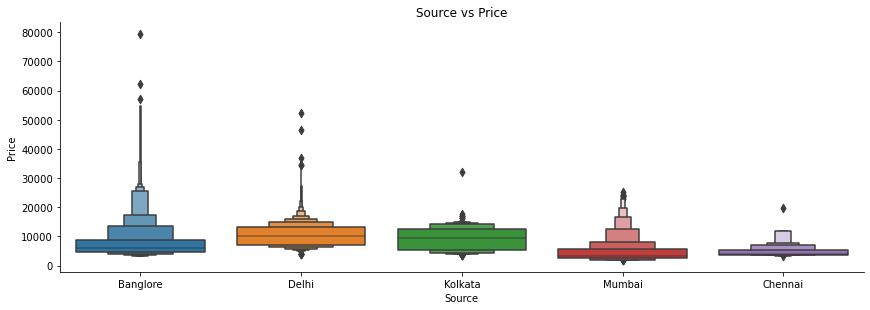

In [49]:
# Source vs Price

sns.catplot(y = "Price", x = "Source", data = dataset.sort_values("Price", ascending = False), kind="boxen", height = 4, aspect = 3)
plt.title('Source vs Price')
plt.show()

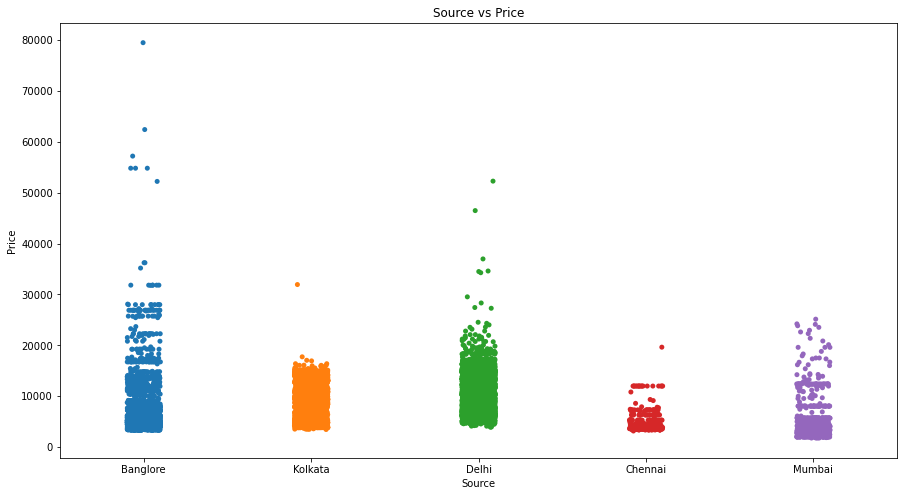

In [50]:
plt.figure(figsize = (15, 8))
ax = sns.stripplot(dataset['Source'], dataset['Price'])
ax.set(xlabel = 'Source', ylabel = 'Price')
plt.title('Source vs Price')
plt.show()

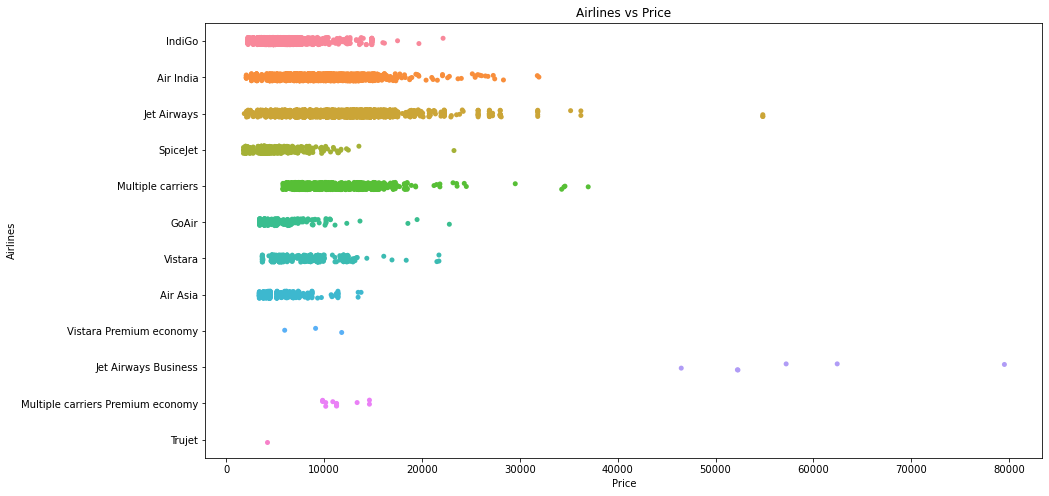

In [51]:
plt.figure(figsize = (15, 8))
ax = sns.stripplot(dataset['Price'], dataset['Airline'])
ax.set(xlabel = 'Price', ylabel = 'Airlines')
plt.title('Airlines vs Price')
plt.show()

In [52]:
# As Source is Nominal Categorical data we will perform OneHotEncoding

Source = dataset[["Source"]]

Source = pd.get_dummies(Source, drop_first= True)

Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [53]:
# 'Destination' exploration
dataset['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [54]:
# As Destination is Nominal Categorical data we will perform OneHotEncoding

Destination = dataset[["Destination"]]

Destination = pd.get_dummies(Destination, drop_first = True)

Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [55]:
dataset['Route'].value_counts()

DEL → BOM → COK                      2376
BLR → DEL                            1552
CCU → BOM → BLR                       979
CCU → BLR                             724
BOM → HYD                             621
                                     ... 
BOM → NDC → HYD                         1
BLR → CCU → BBI → HYD → VGA → DEL       1
CCU → RPR → HYD → BLR                   1
BLR → HBX → BOM → AMD → DEL             1
BOM → VNS → DEL → HYD                   1
Name: Route, Length: 128, dtype: int64

In [56]:
dataset['Route_1']=dataset['Route'].str.split('→').str[0]
dataset['Route_2']=dataset['Route'].str.split('→').str[1]
dataset['Route_3']=dataset['Route'].str.split('→').str[2]
dataset['Route_4']=dataset['Route'].str.split('→').str[3]
dataset['Route_5']=dataset['Route'].str.split('→').str[4]

In [57]:
dataset.head()

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,...,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,...,20,1,10,2,50,BLR,DEL,NaN,NaN,NaN
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,...,50,13,15,7,25,CCU,IXR,BBI,BLR,NaN
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,...,25,4,25,19,0,DEL,LKO,BOM,COK,NaN
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,...,5,23,30,5,25,CCU,NAG,BLR,NaN,NaN
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,...,50,21,35,4,45,BLR,NAG,DEL,NaN,NaN


In [58]:
dataset['Route_1'].fillna('None',inplace=True)
dataset['Route_2'].fillna('None',inplace=True)
dataset['Route_3'].fillna('None',inplace=True)
dataset['Route_4'].fillna('None',inplace=True)
dataset['Route_5'].fillna('None',inplace=True)

In [59]:
dataset.head()

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,...,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,...,20,1,10,2,50,BLR,DEL,None,None,None
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,...,50,13,15,7,25,CCU,IXR,BBI,BLR,None
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,...,25,4,25,19,0,DEL,LKO,BOM,COK,None
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,...,5,23,30,5,25,CCU,NAG,BLR,None,None
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,...,50,21,35,4,45,BLR,NAG,DEL,None,None


In [60]:
for feature in dataset.columns:
    print('{} has total {} categories \n'.format(feature,len(dataset[feature].value_counts())))

Airline has total 12 categories 

Date_of_Journey has total 40 categories 

Source has total 5 categories 

Destination has total 6 categories 

Route has total 128 categories 

Duration has total 368 categories 

Total_Stops has total 5 categories 

Additional_Info has total 9 categories 

Price has total 1870 categories 

Journey_day has total 9 categories 

Journey_month has total 7 categories 

Dep_hour has total 24 categories 

Dep_min has total 12 categories 

Arrival_hour has total 24 categories 

Arrival_min has total 12 categories 

Duration_hours has total 44 categories 

Duration_mins has total 12 categories 

Route_1 has total 5 categories 

Route_2 has total 45 categories 

Route_3 has total 30 categories 

Route_4 has total 14 categories 

Route_5 has total 6 categories 



In [61]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [62]:
dataset.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journey_day',
       'Journey_month', 'Dep_hour', 'Dep_min', 'Arrival_hour', 'Arrival_min',
       'Duration_hours', 'Duration_mins', 'Route_1', 'Route_2', 'Route_3',
       'Route_4', 'Route_5'],
      dtype='object')

In [63]:
for i in ['Route_1', 'Route_2', 'Route_3', 'Route_4','Route_5']:
    dataset[i]=encoder.fit_transform(dataset[i])

In [64]:
dataset.head()

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,...,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,...,20,1,10,2,50,0,13,29,13,5
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,...,50,13,15,7,25,2,25,1,3,5
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,...,25,4,25,19,0,3,32,4,5,5
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,...,5,23,30,5,25,2,34,3,13,5
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,...,50,21,35,4,45,0,34,8,13,5


In [65]:
# 'total_stops' exploration
dataset.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

In [66]:
dataset.head()

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,...,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,0,No info,3897,24,...,20,1,10,2,50,0,13,29,13,5
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2,No info,7662,5,...,50,13,15,7,25,2,25,1,3,5
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2,No info,13882,6,...,25,4,25,19,0,3,32,4,5,5
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1,No info,6218,5,...,5,23,30,5,25,2,34,3,13,5
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1,No info,13302,3,...,50,21,35,4,45,0,34,8,13,5


In [67]:
(dataset.groupby(['Total_Stops', 'Duration_hours'])['Airline'].count())

Total_Stops  Duration_hours
0            1                  621
             2                 2401
             3                  469
1            3                   31
             4                  220
                               ... 
3            29                   1
             30                   2
             35                   3
             38                  13
4            29                   1
Name: Airline, Length: 86, dtype: int64

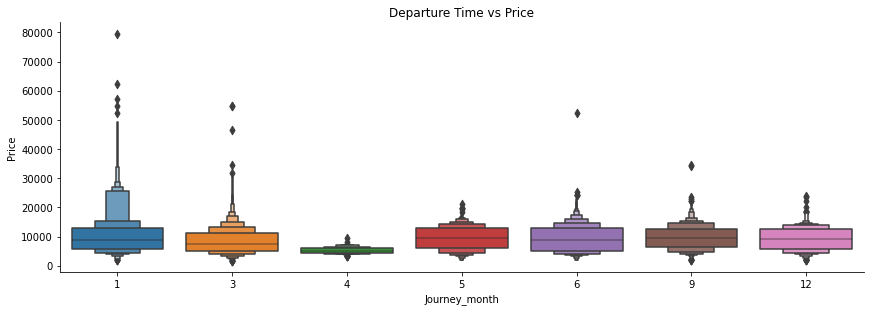

In [68]:
# Dep Time vs Price

sns.catplot(y = 'Price', x = 'Journey_month', data = dataset.sort_values("Price", ascending = False), kind="boxen", height = 4, aspect = 3)
plt.title('Departure Time vs Price')
plt.show()

In [69]:
dataset['Total_Stops'].value_counts()

1    5625
0    3491
2    1520
3      45
4       1
Name: Total_Stops, dtype: int64

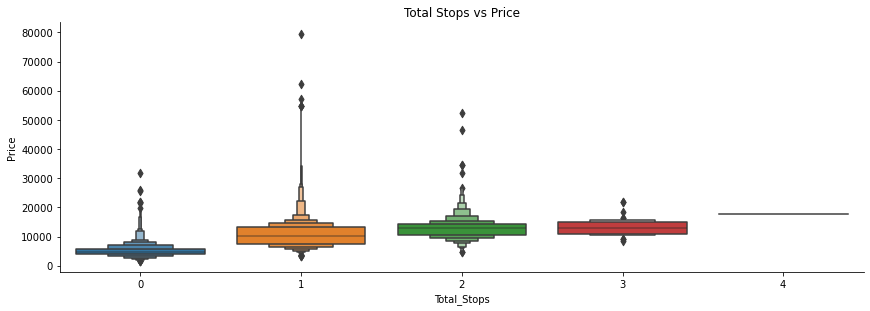

In [70]:
# Total_Stops vs Price

sns.catplot(y = 'Price', x = 'Total_Stops', data = dataset.sort_values("Price", ascending = False), kind="boxen", height = 4, aspect = 3)
plt.title('Total Stops vs Price')
plt.show()

In [71]:
dataset.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journey_day',
       'Journey_month', 'Dep_hour', 'Dep_min', 'Arrival_hour', 'Arrival_min',
       'Duration_hours', 'Duration_mins', 'Route_1', 'Route_2', 'Route_3',
       'Route_4', 'Route_5'],
      dtype='object')

In [72]:
# Concatenate dataframe --> train_data + Airline + Source + Destination

dataset = pd.concat([Airline,dataset,Source, Destination], axis = 1)

In [73]:
dataset.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,...,Route_5,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,1,0,0,0,0,0,0,0,...,5,0,0,0,0,0,0,0,0,1
1,1,0,0,0,0,0,0,0,0,0,...,5,0,0,1,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,...,5,0,1,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,5,0,0,1,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,5,0,0,0,0,0,0,0,0,1


In [74]:
# 'journey_month' exploration
dataset['Journey_month'].value_counts()

6     2535
3     2211
5     2074
9     1406
1     1075
12     957
4      424
Name: Journey_month, dtype: int64

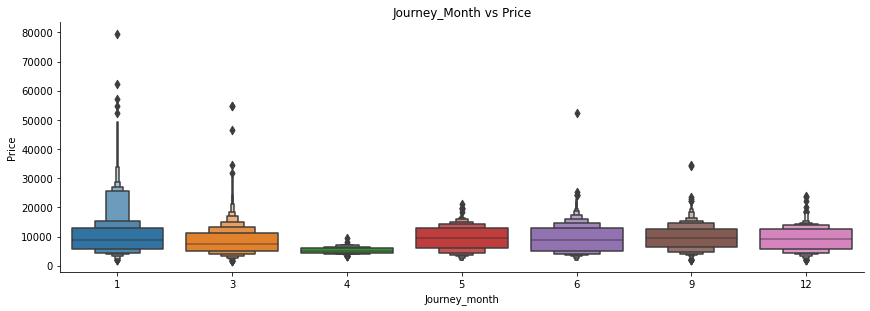

In [75]:
# journey_month vs Price

sns.catplot(y = 'Price', x = 'Journey_month', data = dataset.sort_values("Price", ascending = False), kind="boxen", height = 4, aspect = 3)
plt.title('Journey_Month vs Price')
plt.show()

In [76]:
dataset['Additional_Info'].value_counts()

No info                         8347
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
2 Long layover                     1
1 Short layover                    1
Red-eye flight                     1
Name: Additional_Info, dtype: int64

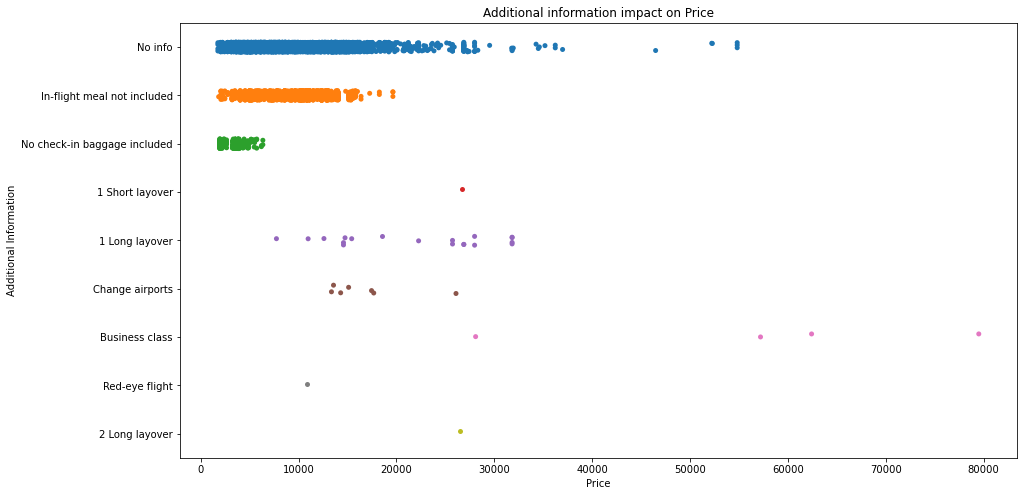

In [77]:
plt.figure(figsize = (15, 8))
ax = sns.stripplot(dataset['Price'], dataset['Additional_Info'])
ax.set(xlabel = 'Price', ylabel = 'Additional Information')
plt.title('Additional information impact on Price')
plt.show()

In [78]:
dataset.columns

Index(['Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journey_day',
       'Journey_month', 'Dep_hour', 'Dep_min', 'Arrival_hour', 'Arrival_min',
       'Duration_hours', 'Duration_mins', 'Route_1', 'Route_2', 'Route_3',
       'Route_4', 'Route_5', 'Source_Chennai', 'Source_Delhi',
       'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi'],
      dtype='object')

In [79]:
# Dropping unnecessary columns

dataset.drop(["Route", "Additional_Info", "Airline", "Source", "Destination", "Duration","Date_of_Journey" ], axis = 1, inplace = True)

In [80]:
dataset.columns

Index(['Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Total_Stops', 'Price', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_mins', 'Route_1', 'Route_2', 'Route_3', 'Route_4', 'Route_5',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [81]:
# Checking for Outliers
def plot(df,col):
    fig,(ax1,ax2)=plt.subplots(2,1)
    sns.distplot(df[col],ax=ax1)
    sns.boxplot(df[col],ax=ax2)

<Figure size 2160x1440 with 0 Axes>

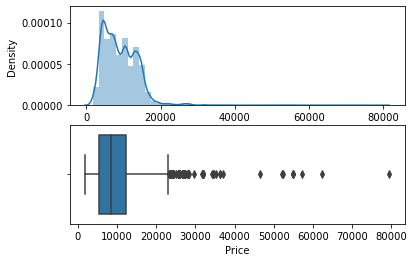

In [82]:
plt.figure(figsize=(30,20))
plot(dataset, 'Price')

In [83]:
# Dealing with Outliers
dataset['Price']=np.where(dataset['Price']>=40000,dataset['Price'].median(),dataset['Price'])

<Figure size 2160x1440 with 0 Axes>

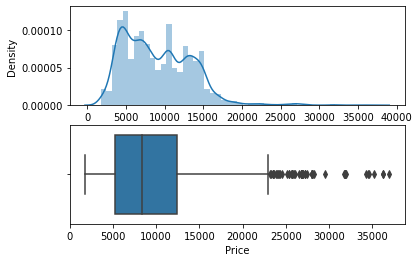

In [84]:
plt.figure(figsize=(30,20))
plot(dataset,'Price')

In [85]:
X = dataset.drop('Price', axis=1)

In [86]:
X.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,...,Route_5,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,1,0,0,0,0,0,0,0,...,5,0,0,0,0,0,0,0,0,1
1,1,0,0,0,0,0,0,0,0,0,...,5,0,0,1,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,...,5,0,1,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,5,0,0,1,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,5,0,0,0,0,0,0,0,0,1


In [87]:
X.shape

(10682, 34)

In [88]:
y = dataset['Price']
y

0         3897.0
1         7662.0
2        13882.0
3         6218.0
4        13302.0
          ...   
10678     4107.0
10679     4145.0
10680     7229.0
10681    12648.0
10682    11753.0
Name: Price, Length: 10682, dtype: float64

In [89]:
from sklearn.feature_selection import mutual_info_classif

In [90]:
mutual_info_classif(X, y)

array([0.76528013, 0.09999059, 0.67294889, 0.90640515, 0.        ,
       0.57724621, 0.01897009, 0.32203825, 0.00326348, 0.21837474,
       0.        , 2.1512067 , 1.07794448, 0.83669619, 1.39625679,
       1.21955345, 1.8541038 , 1.55010511, 1.77885699, 1.06382717,
       2.03150456, 2.78412732, 2.29085634, 1.45085132, 0.74685017,
       0.16791988, 1.56986408, 0.86291182, 0.30395058, 1.53931414,
       0.39937993, 0.28772482, 0.17752188, 0.35703303])

In [91]:
imp = pd.DataFrame(mutual_info_classif(X, y), index=X.columns)
imp

,0
Airline_Air India,0.747451
Airline_GoAir,0.100096
Airline_IndiGo,0.697598
Airline_Jet Airways,0.923978
Airline_Jet Airways Business,0.000000
Airline_Multiple carriers,0.588158
Airline_Multiple carriers Premium economy,0.000000
Airline_SpiceJet,0.323094
Airline_Trujet,0.004200
Airline_Vistara,0.235014


In [92]:
imp.columns=['importance']
imp.sort_values(by='importance', ascending=False)

,importance
Route_2,2.722159
Route_3,2.342129
Total_Stops,2.130574
Route_1,2.042456
Arrival_hour,1.836626
Duration_hours,1.772789
Destination_Cochin,1.540837
Source_Delhi,1.529218
Arrival_min,1.521900
Route_4,1.505180


In [93]:
# Data Analysis
from sklearn.model_selection import train_test_split

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [95]:
from sklearn import metrics

import pickle
def predict(ml_model, dump):
    model = ml_model.fit(X_train, y_train)
    print('Training Score: {}'.format(model.score(X_train, y_train)))
    predictions = model.predict(X_test)
    print('Predictions are: {}'.format(predictions))
    print(' \n')
    r2_score = metrics.r2_score(y_test, predictions)
    print('r2 score is: {}'.format(r2_score))
    
    print('MAE:', metrics.mean_absolute_error(y_test, predictions))
    print('MSE:', metrics.mean_squared_error(y_test, predictions))
    print('RMSE:', np.sqrt(metrics.mean_absolute_error(y_test, predictions)))
    sns.distplot(y_test-predictions)
    
    if dump==1:
        file=open('C:/Users/mandar/model.pkl', 'wb')
        pickle.dump(model,file)

In [96]:
# Machine Learning Algorithim

In [97]:
# XG Boost
import xgboost
from xgboost import XGBRegressor

Training Score: 0.9309195386680048
Predictions are: [ 6009.169  14311.072   9170.655  ... 18576.654  13283.919   2980.1182]
 

r2 score is: 0.8694825142821346
MAE: 1086.3504289083521
MSE: 2544987.7236989397
RMSE: 32.95983053518862


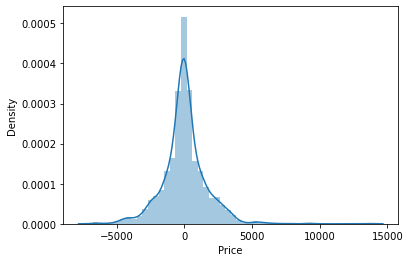

In [98]:
predict(XGBRegressor(),0)

In [99]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

Training Score: 0.9530278412076133
Predictions are: [ 6179.08       13852.43        8583.82047619 ... 17161.22
 14628.38        2805.44      ]
 

r2 score is: 0.8312763976439687
MAE: 1121.651513359749
MSE: 3289976.7746260264
RMSE: 33.49106617233541


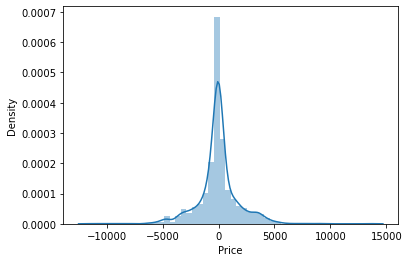

In [100]:
predict(RandomForestRegressor(),1)

In [101]:
# Linear Regression
from sklearn.linear_model import LinearRegression

Training Score: 0.6162275761094436
Predictions are: [ 6411.7876154  12521.39943606  8922.245844   ... 12893.92066872
  9041.02909445  1809.35796221]
 

r2 score is: 0.6136116130956023
MAE: 1969.7521382053785
MSE: 7534267.886352071
RMSE: 44.38188975477924


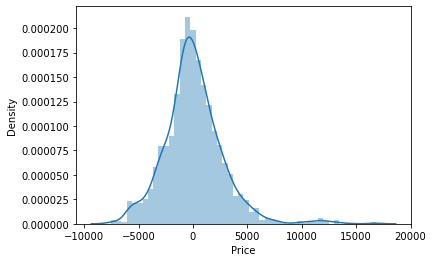

In [102]:
predict(LinearRegression(),0)

In [103]:
# Decision Tree 
from sklearn.tree import DecisionTreeClassifier

Training Score: 0.8826214160327677
Predictions are: [ 7266. 13217.  4966. ... 18253. 14871.  2754.]
 

r2 score is: 0.6824625628347312
MAE: 1359.5226953673373
MSE: 6191728.832007487
RMSE: 36.871705891744924


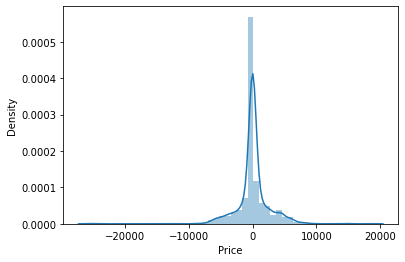

In [104]:
predict(DecisionTreeClassifier(),0)

In [105]:
# K-Nearest Neighbor
from sklearn.neighbors import KNeighborsRegressor

Training Score: 0.7778303783800866
Predictions are: [ 8127.  15550.8  5823.6 ... 16831.8 12945.   2754. ]
 

r2 score is: 0.6746456090652596
MAE: 1702.8763687412259
MSE: 6344153.246794572
RMSE: 41.2659226086274


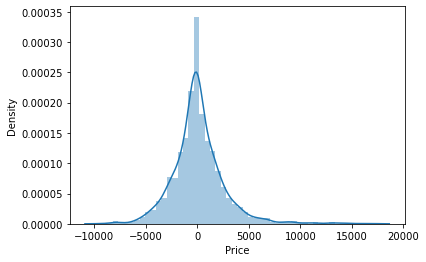

In [106]:
predict(KNeighborsRegressor(),0)

In [107]:
# Hyperparameter Tuning
from sklearn.ensemble import RandomForestRegressor

In [108]:
reg_rf = RandomForestRegressor()

In [109]:
from sklearn.model_selection import RandomizedSearchCV

In [110]:
n_estimators= [int(x) for x in np.linspace(start=100, stop=1200, num=6)]
max_depth = [int(x) for x in np.linspace(start=5, stop=30, num=4)]

In [111]:
random_grid={
    'n_estimators' : n_estimators,
    'max_features' : ['auto', 'sqrt'],
    'max_depth' : max_depth,
    'min_samples_split' : [5,10,15,100]
}

In [112]:
rf_random = RandomizedSearchCV(estimator=reg_rf, 
                              param_distributions=random_grid,
                              cv=3,
                              verbose=2,
                              n_jobs=-1)

In [113]:
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 13, 21, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_split': [5, 10, 15, 100],
                                        'n_estimators': [100, 320, 540, 760,
                                                         980, 1200]},
                   verbose=2)

In [114]:
rf_random.best_params_

{'n_estimators': 540,
 'min_samples_split': 5,
 'max_features': 'auto',
 'max_depth': 13}

In [115]:
prediction = rf_random.predict(X_test)

In [116]:
metrics.r2_score(y_test, prediction)

0.8575943024417763

In [117]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 1089.1382831718938
MSE: 2776798.4502390316
RMSE: 1666.3728425052514


<AxesSubplot:xlabel='Price', ylabel='Density'>

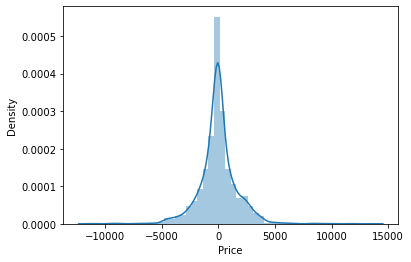

In [118]:
sns.distplot(y_test-prediction)

In [119]:
file=open('C:/Users/mandar/rf_random.pkl', 'wb')

In [120]:
pickle.dump(rf_random, file)

In [121]:
model = open('C:/Users/mandar/model.pkl', 'rb')
forest =pickle.load(model)

In [122]:
predictions=forest.predict(X_test)

In [123]:
metrics.r2_score(y_test, predictions)

0.8312763976439687

In [124]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 1121.651513359749
MSE: 3289976.7746260264
RMSE: 1813.8293124288257


<AxesSubplot:xlabel='Price', ylabel='Density'>

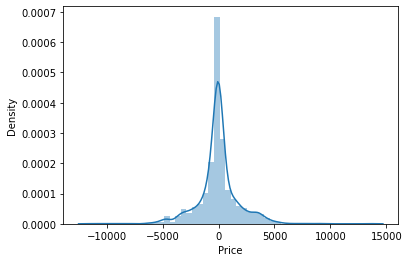

In [125]:
sns.distplot(y_test-predictions)